In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [18]:
# I don't understand why I can't do something like
# from ..cache_updater import ActivityEdge

In [35]:
# redefining the Edge class for fast prototyping 

class SimpleEdge():
    def __init__(self, time, rising):
        self.time = time  #Integer
        self.rising = rising  #Boolean

    def __eq__(self, other):
        return (
            isinstance(other, SimpleEdge)
            and self.time == other.time
            and self.rising == other.rising
        )

    def __repr__(self):
        arrow = "⬈" if self.rising else "⬊"
        return f"<SimpleEdge {self.time} {arrow}>"
    
    # Adding a to_dict method for convenient conversion to pandas
    def to_dict(self):
        return {
            "time": self.time,
            "rising": self.rising
        }
        

In [36]:
# make a small dataset to graph
random.seed(0)
rand_seq = sorted([random.randint(0, 1000) for _ in range(10)])

In [37]:
# make a small dataset to graph
sample_edges = [
    SimpleEdge(t, True) if i%2 == 0 
    else SimpleEdge(t, False) 
    for i, t in enumerate(rand_seq)
]

In [38]:
sample_edges

[<SimpleEdge 41 ⬈>,
 <SimpleEdge 265 ⬊>,
 <SimpleEdge 394 ⬈>,
 <SimpleEdge 430 ⬊>,
 <SimpleEdge 497 ⬈>,
 <SimpleEdge 523 ⬊>,
 <SimpleEdge 776 ⬈>,
 <SimpleEdge 864 ⬊>,
 <SimpleEdge 911 ⬈>,
 <SimpleEdge 988 ⬊>]

In [40]:
# assuming a list of Edge objects is how we'll get the data 
# to generate analytics
# convert a list of SimpleEdges to a pandas dataframe

sample_edges_df = pd.DataFrame.from_records([edge.to_dict() for edge in sample_edges])

In [41]:
sample_edges_df

,time,rising
0,41,True
1,265,False
2,394,True
3,430,False
4,497,True
5,523,False
6,776,True
7,864,False
8,911,True
9,988,False


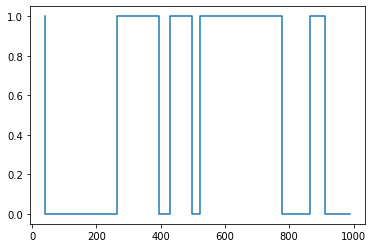

In [44]:
# Let's graph this!

plt.step(sample_edges_df.time, sample_edges_df.rising)
plt.show()

Hmm... Seems like we want to revert the boolean in the `rising` column. When `rising` is true it's being read as 1, which is the opposite of what we want

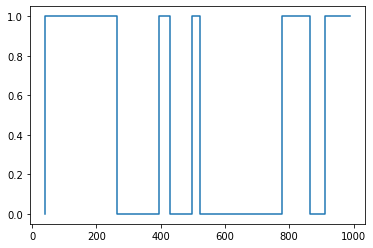

In [49]:
plt.step(sample_edges_df.time, ~np.array(sample_edges_df.rising))
plt.show()

In [50]:
# TODO:
# - consider 0 and max_time
# - dimensions of the graph
# - in reality we don't have timestamps from 1 to 1000, we have unix
# timestamps, which have much larger absolute values. How does that 
# affect the graphs?
# Enhancement: highlighting time intervals that exceed session_target?